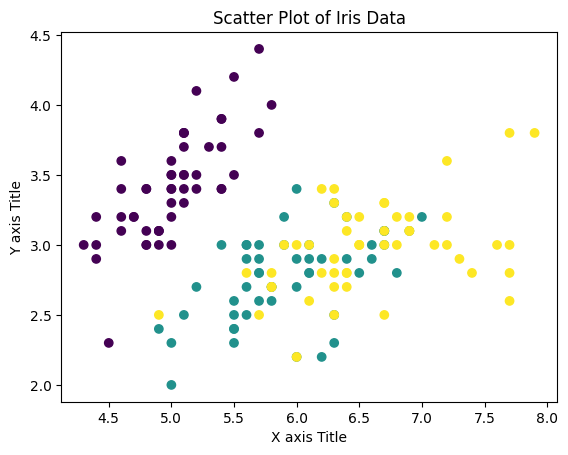

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

Iris_data = np.load("Iris_data.npy")
Iris_labels = np.load("Iris_labels.npy")
#print(data)
#print(data_new)
x =Iris_data[:,0]
y =Iris_data[:,1]
plt.scatter(x,y, c = Iris_labels)
plt.title("Scatter Plot of Iris Data")
plt.xlabel("X axis Title")
plt.ylabel("Y axis Title")
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


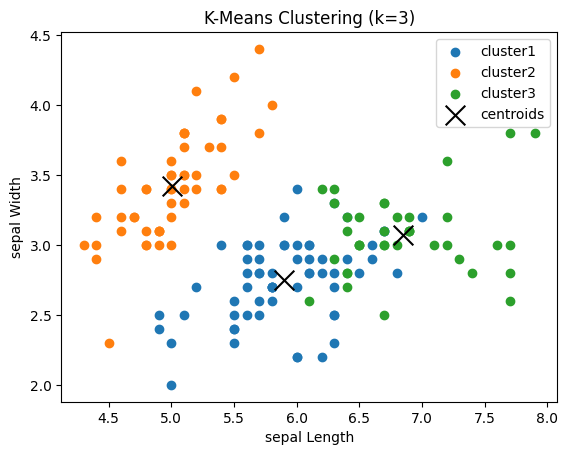

In [56]:

k = 3;
kmeans = KMeans(n_clusters=k, random_state=0)

kmeans.fit(Iris_data)


labels = kmeans.predict(Iris_data)

centroids= kmeans.cluster_centers_

for i in range(k):
  plt.scatter(Iris_data[labels ==i][:, 0], Iris_data[labels == i][:, 1], label=f'cluster{i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=200, label='centroids')

plt.title(f'K-Means Clustering (k={k})')
plt.xlabel('sepal Length')
plt.ylabel('sepal Width')
plt.legend()
plt.show()

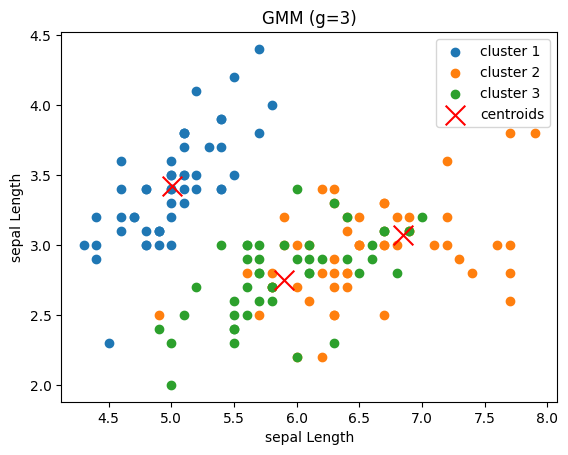

In [57]:


g = 3
gmm = GaussianMixture(n_components=g, random_state=0)
gmm.fit(Iris_data)
labels = gmm.predict(Iris_data)
probs = gmm.predict_proba(Iris_data)

for i in range(k):
  plt.scatter(Iris_data[labels == i][:, 0], Iris_data[labels == i][:, 1], label=f'cluster {i +1}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker= 'x', s=200, label='centroids')

plt.title(f'GMM (g={k})')
plt.xlabel('sepal Length')
plt.ylabel('sepal Length')
plt.legend()
plt.show()

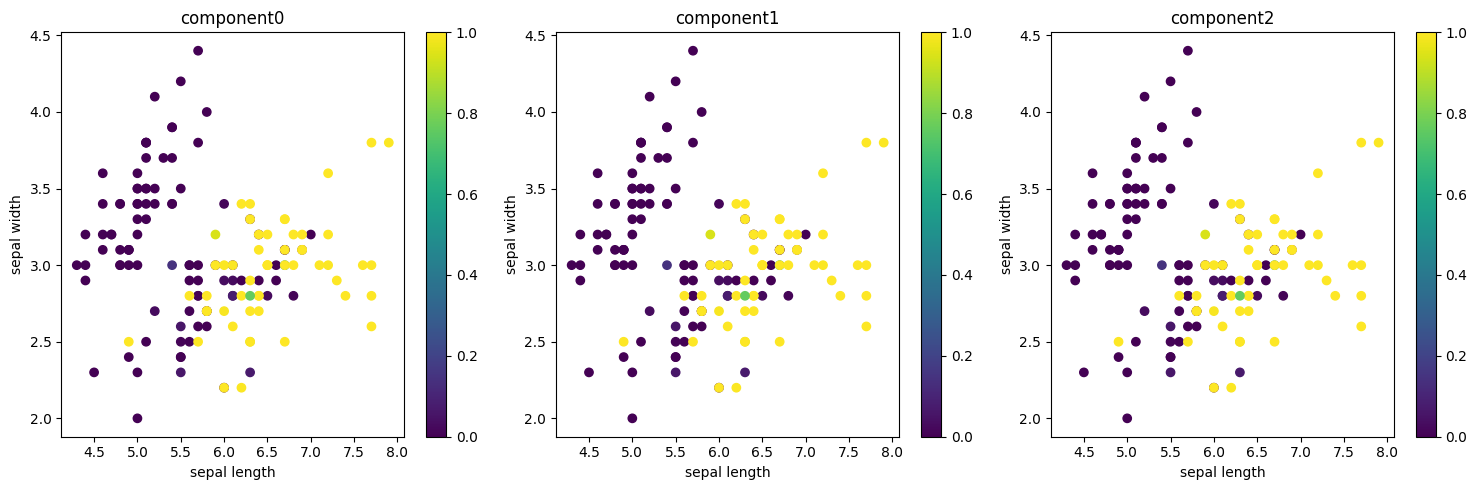

In [58]:
plt.figure(figsize=(15,5))

for i in range(g):
  plt.subplot(1, g, i+1)
  plt.scatter(Iris_data[:, 0], Iris_data[:, 1], c=probs[:, 1])
  plt.title(f'component{i}')
  plt.xlabel('sepal length')
  plt.ylabel('sepal width')
  plt.colorbar()

plt.tight_layout()
plt.show()

Number of data points: 100
Number of features: 10


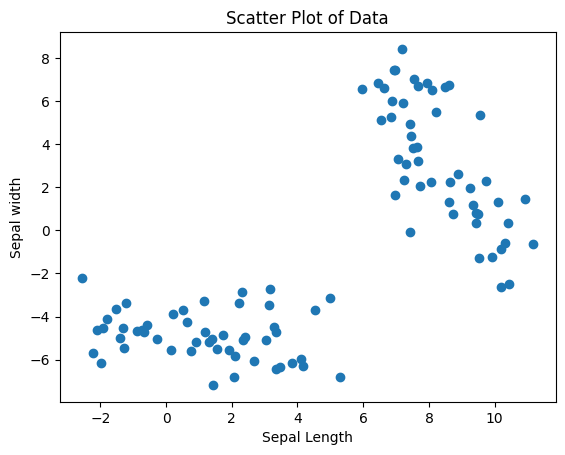

In [59]:


data = np.load("task2_4.npy");
x = data[:, 0]
y = data[:, 1]

plt.scatter(x, y)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.title('Scatter Plot of Data')

from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.datasets import load_iris


num_samples, num_features = data.shape
print(f"Number of data points: {num_samples}")
print(f"Number of features: {num_features}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

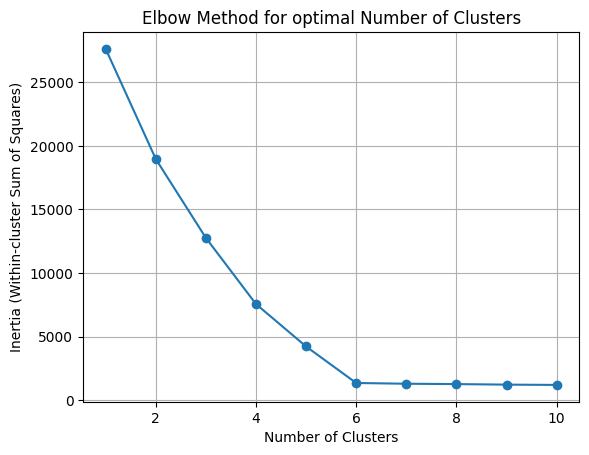

In [66]:
inertia = []
for n_clusters in range(1,11):
  kmeans =KMeans(n_clusters=n_clusters, random_state=0)
  kmeans.fit(data)
  inertia.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.title('Elbow Method for optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.grid()
plt.show()

In [48]:
data = np.load('./Iris_data.npy')
labels = np.load('./Iris_labels.npy')

# Choose two features dimensions to plot, keeping it consistent for the notebook
x_feature = 0
y_feature = 1

In [49]:
# Definition of euclidean distance function
def euclidean_distance(centroids, datapoints):


    n_samples = datapoints.shape[0]
    n_features = datapoints.shape[1]
    n_centroids = centroids.shape[0]

    dists = np.zeros(shape=[n_samples, n_centroids])
    for k in range(n_centroids):
        differences = datapoints - centroids[k, :]
        sum_of_squared_differences = np.zeros(n_samples)
        for i_dimension in range(n_features):
            sum_of_squared_differences += differences[:, i_dimension]**2
        dists[:, k] = np.sqrt(sum_of_squared_differences)

    return dists


# Definition of k-Means algorithm
def k_means(data, k, n_iteration=10, verbose=None):


    n_samples = data.shape[0]
    n_features = data.shape[1]

    # Initialize centroids by randomly selecting k points. Can we do this another way?
    centroids = data[np.random.choice(n_samples, k, replace=False), :]

    i = 0
    early_stop = False
    early_stop_tolerance = 1e-5
    while i < n_iteration and not early_stop:
        prev_centroids = centroids

        # Assignment step
        dists = euclidean_distance(centroids, data)
        predicted_labels = np.argmin(dists, axis=1)

        # Update step
        new_centroids = np.zeros(shape=[k, n_features])

        for i_cluster in range(k):
            # Get all datapoints alocated to cluster i_k
            cluster_data = data[predicted_labels == i_cluster, :]
            # Calculate the mean of this cluster
            new_centroids[i_cluster, :] = np.mean(cluster_data, axis=0)

        centroids = new_centroids
        update_distance = np.sum(np.abs(centroids - prev_centroids))

        # Verbose printing
        if verbose == 'print':
            print(f'Iteration {i}: update distance = {update_distance}')
        elif verbose == 'plot':
            plt.figure()
            plt.scatter(data[:, x_feature], data[:, y_feature], c=predicted_label)
            plt.scatter(centroids[:, x_feature], centroids[:, y_feature], marker='x', s=50)
            plt.title(f'k-Means Iteration {i}, Update dist: {update_distance}')
            plt.show()

        # Early stopping
        if update_distance < early_stop_tolerance:
            print(f'Early stop on iteration {i}')
            early_stop = True

        i += 1

    # One final assignment to get final predictions
    predicted_labels = np.argmin(euclidean_distance(centroids, data), axis=1)

    return predicted_labels, centroids

Iteration 0: update distance = 5.046976231315854
Iteration 1: update distance = 0.8234938787627499
Iteration 2: update distance = 0.25576714951714785
Iteration 3: update distance = 0.19890665349533077
Iteration 4: update distance = 0.1362966677735682
Iteration 5: update distance = 0.0
Early stop on iteration 5


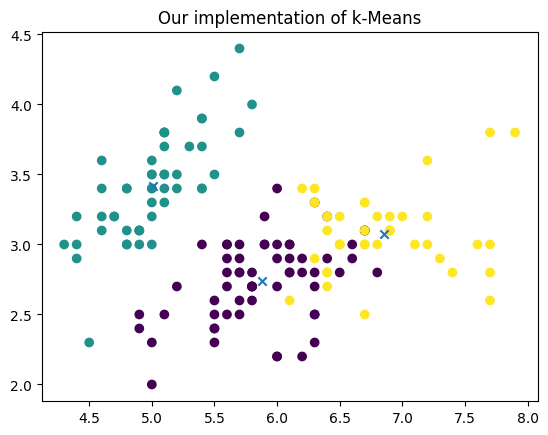

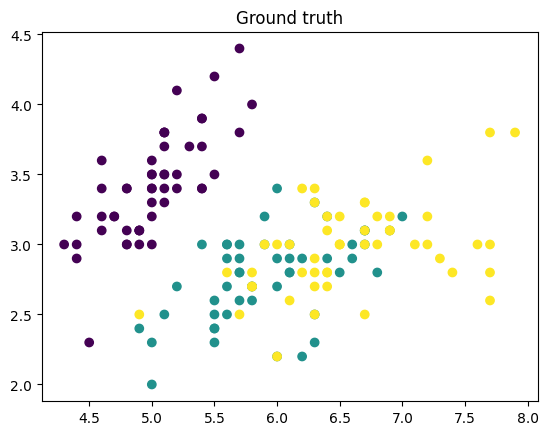

In [50]:
k = 3
n_iteration = 500

predicted_label, k_centroid = k_means(data, k, n_iteration, verbose='print')

# Visualisation of model predictions
plt.figure()
plt.scatter(data[:, x_feature], data[:, y_feature], c=predicted_label)
plt.scatter(k_centroid[:, x_feature], k_centroid[:, y_feature], marker='x')
plt.title('Our implementation of k-Means')
plt.show()

# Visualisation of ground truth
plt.figure()
plt.scatter(data[:, x_feature], data[:, y_feature], c=labels)
plt.title('Ground truth')
plt.show()

In [51]:
# E-Step
def multivariate_gaussian_density(data, mu, cov):
    '''Apply the E-Step of the GMM algorithm. Calculating the multivariate Gaussian density of the data.

    Keyword arguments:
    data -- 1xF, data sample (F dimensions)
    mu -- 1xF vector, mean location of the Gaussian component (F dimensions)
    cov -- FxF matrix, the covariance matrix of the Gaussian component (F dimensions)

    Returns:
    result -- scalar, the Gaussian density function response (probability)
    '''

    n_sample = data.shape[0]

    determinant = np.linalg.det(cov)
    normalisation_factor = 1.0 / ((2 * np.pi)**(n_sample / 2) * determinant ** (1.0 / 2))
    mean_centred_data = data - mu
    inverse_covariance = np.linalg.inv(cov)
    result = np.e**(-(1.0 / 2) * (mean_centred_data @ inverse_covariance @ mean_centred_data.T))
    result = normalisation_factor * result

    return result


# Calculate the posterior probabilities per component for each datapoint
def posterior_prob(data, centroids, cov, mix):
    '''Calculate posterior probability for each Guassian component.

    Keyword arguments:
    data -- NxF matrix, data to cluster (N samples, F dimensions)
    centroids -- GxF matrix, current centroids (mu) of the Gaussian components (G components)
    cov -- FxFxG tensor, current covariance matrices (FxF) for each Gaussian component
    mix -- Gx1 vector, current mixing coefficients for each Gaussian component

    Returns:
    posteriors -- NxG matrix, posterior probability that each sample belongs to a Gaussian component (N samples, G components)
    '''

    n_sample = data.shape[0]
    n_component = centroids.shape[0]
    p = np.zeros([n_sample, n_component])
    p_total = np.zeros(n_sample)
    posteriors = np.zeros([n_sample, n_component])

    for i_sample in range(n_sample):
        for i_component in range(n_component):
            p[i_sample, i_component] = multivariate_gaussian_density(
                data[i_sample, :].T, centroids[i_component, :], cov[:, :, i_component])
            p_total[i_sample] = p_total[i_sample] + p[i_sample, i_component]

        for i_component in range(n_component):
            posteriors[i_sample, i_component] = (
                p[i_sample, i_component] * mix[i_component]) / (p_total[i_sample] * mix[i_component])

    return posteriors


# M-Step
def update_params(data, posteriors, mix, cov, centroids):
    '''Apply the M-Step of GMM algorithm. Updating the component parameters and assignments.

    Keyword arguments:
    data -- NxF matrix, data to cluster (N samples, F dimensions)
    posteriors -- NxG matrix, posterior probability that each sample belongs to a Gaussian component (N samples, G components)
    mix -- Gx1 vector, current mixing coefficients for each Gaussian component
    cov -- FxFxG tensor, current covariance matrices (FxF) for each Gaussian component
    centroids -- GxF matrix, current centroids (mu) of the Gaussian components (G components)

    Returns:
    new_mix -- Gx1 vector, updated mixing coefficients for each Gaussian component
    new_cov -- FxFxG tensor, updated covariance matrices (FxF) for each Gaussian component
    new_centroids -- GxF matrix, updated centroids (mu) of the Gaussian components (G components)
    '''

    n_sample = data.shape[0]
    n_component = centroids.shape[0]

    # Transpose due to numpy's handling of dimensions
    data = data.T

    # Update mixing coefs
    cluster_weight = np.sum(posteriors, axis=0)
    new_mix = (1/data.shape[0]) * cluster_weight

    # Update centroids
    new_centroids = np.zeros(centroids.shape)
    for i_component in range(n_component):
        new_centroids[i_component, :] = np.sum(posteriors[:, i_component] * data, axis=1) / cluster_weight[i_component]

    # Update covariance matrices
    new_cov = np.zeros(cov.shape)
    for i_component in range(n_component):
        mu_centred_data = data - np.expand_dims(new_centroids[i_component, :], axis=-1)
        for i_sample in range(n_sample):
            cov = mu_centred_data[:, i_sample:i_sample+1] @ mu_centred_data[:, i_sample:i_sample+1].T
            scaled_cov = posteriors[i_sample, i_component] * cov
            new_cov[:, :, i_component] += scaled_cov

        new_cov[:, :, i_component] /= cluster_weight[i_component]

    return new_mix, new_cov, new_centroids


# Definition of GMM function, iteratively applying the E and M steps
def gmm(data, g, n_iteration=10, verbose=None):
    '''Apply the GMM algorithm to cluster the input data into g Gaussian components.

    Keyword arguments:
    data -- NxF matrix, data to cluster (N samples, F dimensions)
    g -- scalar int, the number of clusters to generate
    n_iteration -- scalar int, the maximum number of iterations to carry out
    verbose -- choice of {None, 'print', 'plot'}, whether to output details of each iteration

    Returns:
    predicted_labels -- Nx1 vector, predicted cluster IDs based on k-means model (N samples)
    posteriors -- NxG matrix, posterior probability that each sample belongs to a Gaussian component (N samples, G components)
    centroids -- KxF matrix, cluster center locations (K clusters, F dimensions)
    cov -- FxFxG tensor, current covariance matrices (FxF) for each Gaussian component
    mix -- Gx1 vector, current mixing coefficients for each Gaussian component
    '''

    n_sample = data.shape[0]

    # Initialise our Gaussian components by randomly selecting datapoints and allocating equal mixing coefficients.
    # How could we use k-means here?
    # _ , centroids = k_means(data, 3)
    centroids = data[np.random.choice(n_sample, g, replace=False), :]
    cov = np.repeat(np.cov(data, rowvar=False)[:, :, np.newaxis], g, axis=-1)
    mix = np.ones(g) / g

    i = 0
    early_stop = False
    early_stop_tolerance = 1e-5
    while i < n_iteration and not early_stop:
        prev_centroids = centroids

        # E-Step
        posteriors = posterior_prob(data, centroids, cov, mix)
        predicted_labels = np.argmax(posteriors, axis=1)

        # M-Step
        mix, cov, centroids = update_params(
            data, posteriors, mix, cov, centroids)

        update_distance = np.sum(np.abs(centroids - prev_centroids))

        # Verbose printing
        if verbose == 'print':
            print(f'Iteration {i}: update distance = {update_distance}')
        elif verbose == 'plot':
            plt.figure()
            plt.scatter(data[:, x_feature], data[:, y_feature], c=predicted_label)
            plt.scatter(centroids[:, x_feature], centroids[:, y_feature], marker='x')
            plt.title(f'k-Means Iteration {i}, Update dist: {update_distance}')
            plt.show()

        # Early stopping
        if update_distance < early_stop_tolerance:
            print(f'Early stop on iteration {i}')
            early_stop = True

        i += 1

    # One final assignment to get final predictions
    predicted_labels = np.argmax(posterior_prob(data, centroids, cov, mix), axis=1)

    return predicted_labels, posteriors, centroids, cov, mix

Iteration 0: update distance = 6.278433955216336
Iteration 1: update distance = 1.137543312534703
Iteration 2: update distance = 0.9854474092350842
Iteration 3: update distance = 0.6533984313076142
Iteration 4: update distance = 0.25296911062159844
Iteration 5: update distance = 0.13539788861673213
Iteration 6: update distance = 0.1731960443225341
Iteration 7: update distance = 0.20184212805595925
Iteration 8: update distance = 0.21495428691466814
Iteration 9: update distance = 0.23358732017323192
Iteration 10: update distance = 0.24975059585728165
Iteration 11: update distance = 0.22480359271843064
Iteration 12: update distance = 0.1721316798379642
Iteration 13: update distance = 0.13740410004047252
Iteration 14: update distance = 0.12445839278944265
Iteration 15: update distance = 0.10681351751127452
Iteration 16: update distance = 0.07161997203433623
Iteration 17: update distance = 0.04162895964919203
Iteration 18: update distance = 0.02439702551729994
Iteration 19: update distance 

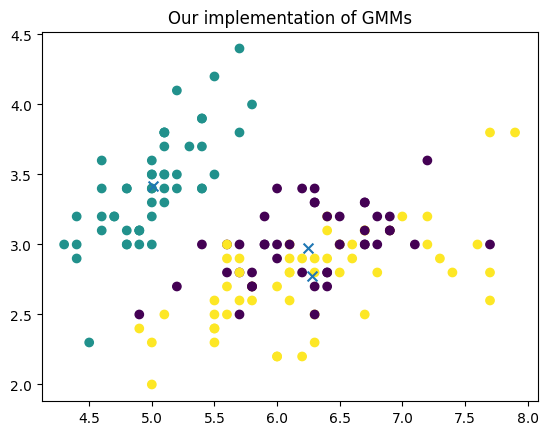

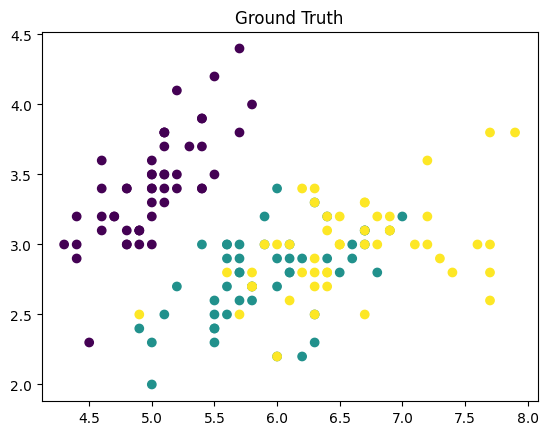

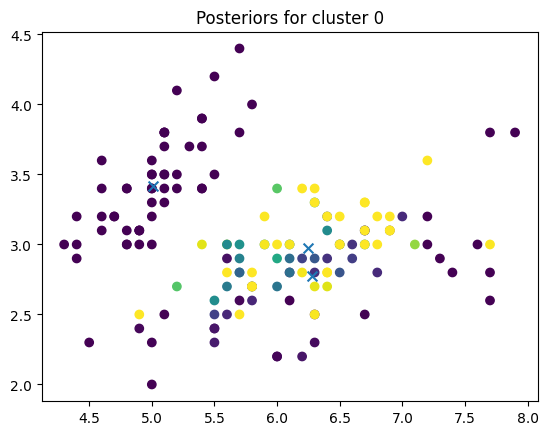

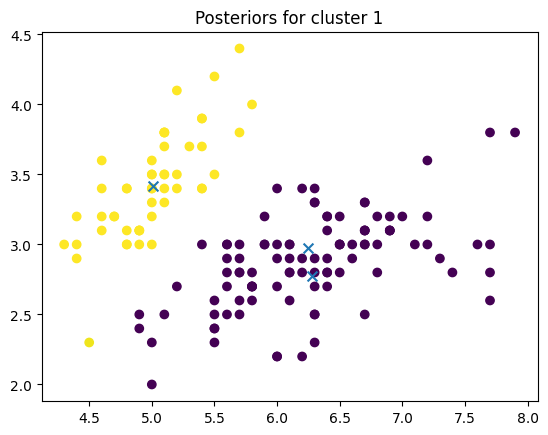

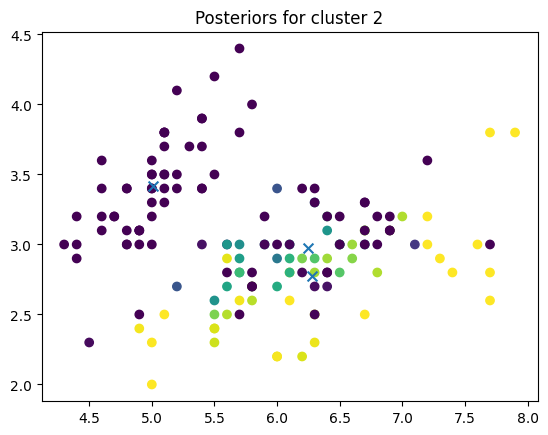

In [53]:
g = 3
n_iteration = 100

predicted_label, posteriors, centroids, cov, mix = gmm(data, g, n_iteration, 'print')

# Visualisation of model predictions
plt.scatter(data[:, x_feature], data[:, y_feature], c=predicted_label)
plt.scatter(centroids[:, x_feature], centroids[:, y_feature], s=50, marker='x')
plt.title('Our implementation of GMMs')
plt.show()

# Visualisation of ground truth
plt.scatter(data[:, x_feature], data[:, y_feature], c=labels)
plt.title('Ground Truth')
plt.show()

# Visualisation of model posteriors
for i_component in range(g):
    plt.scatter(data[:, x_feature], data[:, y_feature], c=posteriors[:, i_component])
    plt.scatter(centroids[:, x_feature], centroids[:, y_feature], s=50, marker='x')
    plt.title(f'Posteriors for cluster {i_component}')
    plt.show()